# Assignment 3 - Mortgage Probability of Default & Fraud - Varadharajan Suresh (vs2769)

The goal is to create model to identify loans potential for default. We will get a general understanding of the dataset and create relevant features that can be used later for efficient modeling. For this particular case we will aggregate the data to the loan_default level and card holder level then build various features.

## Data description
A Columbia partner firm has made its loans dataset available for research. The dataset contains 86 attributes with 80000 records.  We have been directed to use 15 select variables for our assignment.

## Exploratory Data Analysis
This section is to gain a general understanding of the data that we are working with. This is necessary to build features most efficiently and understand the nuances of the data. Furthermore, we will generate insights on the importance of certain variables and encounter issues with the current data structure. We will then transform the data to such a form that we can easily create new features

In [2]:
import numpy as np
import plotly
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

### Reading csv data leveraging Pandas

In [3]:
df = pd.read_csv("XYZloan_default_selected_vars.csv")

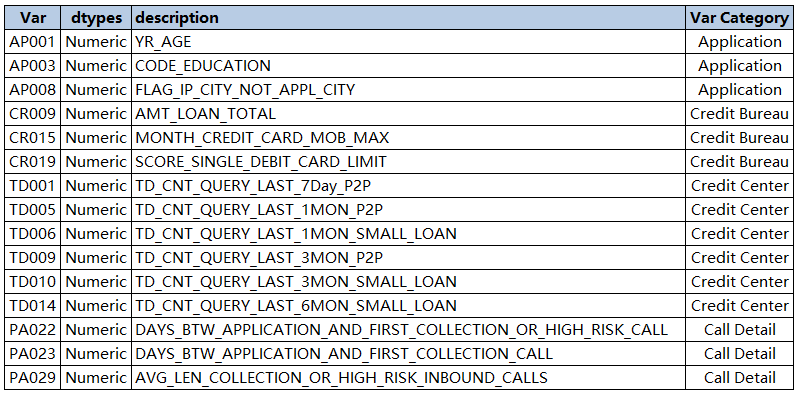

#### Glimpse into the data

In [4]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,id,loan_default,AP001,AP002,AP003,AP004,AP007,AP008,...,CD160,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.00000,80000.000000,...,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.00000,79619.000000,79619.000000,77207.000000
mean,39999.500000,40000.500000,40000.500000,0.193600,31.706913,1.321813,2.014925,11.235413,3.30130,3.117200,...,6.911956,14.271694,11.773358,909.089313,810.786219,1732.693314,1539.33443,2513.226491,2229.606137,5.976272
std,23094.155105,23094.155105,23094.155105,0.395121,7.075070,0.467174,1.196806,2.212313,1.33655,1.306335,...,28.007499,38.235012,33.270641,1379.553332,1245.044602,2441.503517,2172.71384,3404.975112,3005.615048,3.641814
min,0.000000,1.000000,1.000000,0.000000,20.000000,1.000000,1.000000,3.000000,1.00000,1.000000,...,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.00000,-99.000000,-99.000000,0.000000
25%,19999.750000,20000.750000,20000.750000,0.000000,27.000000,1.000000,1.000000,12.000000,2.00000,2.000000,...,2.000000,5.000000,4.000000,84.000000,34.000000,309.000000,226.00000,539.000000,414.000000,3.000000
50%,39999.500000,40000.500000,40000.500000,0.000000,30.000000,1.000000,1.000000,12.000000,3.00000,3.000000,...,7.000000,12.000000,10.000000,475.000000,397.000000,1023.000000,870.00000,1553.000000,1324.000000,5.000000
75%,59999.250000,60000.250000,60000.250000,0.000000,35.000000,2.000000,3.000000,12.000000,5.00000,4.000000,...,14.000000,23.000000,20.000000,1209.000000,1080.000000,2287.000000,2030.00000,3296.000000,2936.000000,8.000000
max,79999.000000,80000.000000,80000.000000,1.000000,56.000000,2.000000,6.000000,12.000000,5.00000,5.000000,...,1061.000000,2792.000000,1579.000000,48585.000000,29664.000000,88364.000000,54651.00000,125352.000000,87312.000000,47.000000


#### Selecting subset of features

In [5]:
features = ['loan_default','AP001', 'AP003', 'AP008', 'CR009', 'CR015', 'CR019', 'PA022', 'PA023', 'PA029', 'TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD014']
df = df[features]

#### Check for missing values

In [6]:
missing_values = df.isnull().sum()
missing_values_per = (df.isnull().sum() / df.isnull().count())
pd.concat([missing_values, missing_values_per],axis=1, keys = ['Count_of_Missing','Percentage'])

,Count_of_Missing,Percentage
loan_default,0,0.000000
AP001,0,0.000000
AP003,0,0.000000
AP008,0,0.000000
CR009,0,0.000000
CR015,0,0.000000
CR019,0,0.000000
PA022,381,0.004763
PA023,381,0.004763
PA029,381,0.004763


#### Filling in missing data

In [7]:
for col in features:
    df.loc[:,col].fillna(df.loc[:,col].mean(),inplace=True)

## Section 1 
### Type 1: Showing the Distribution of X
#### (1.1) Histogram
To plot the histogram to understand the distribution of each of the variables.

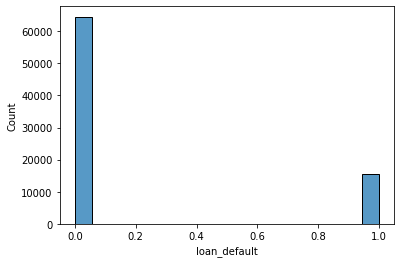

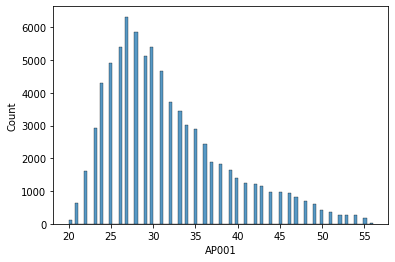

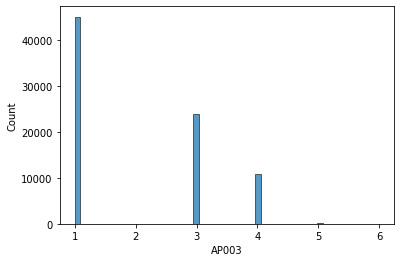

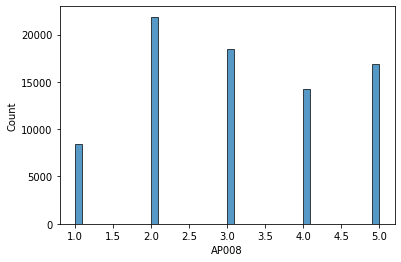

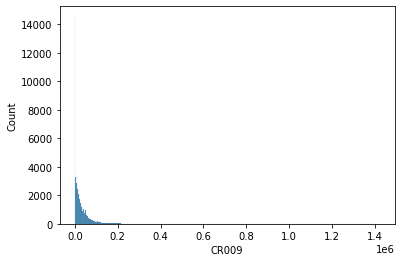

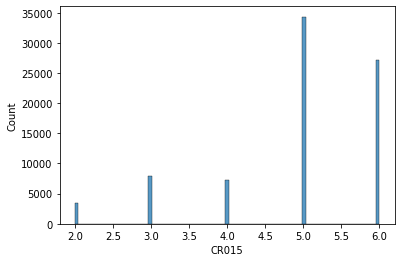

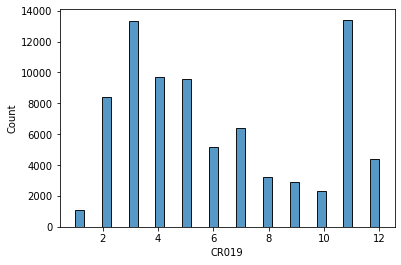

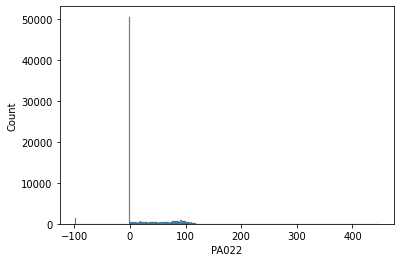

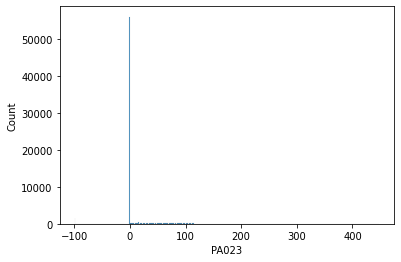

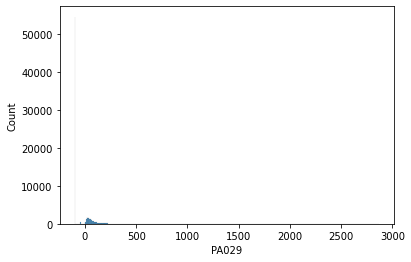

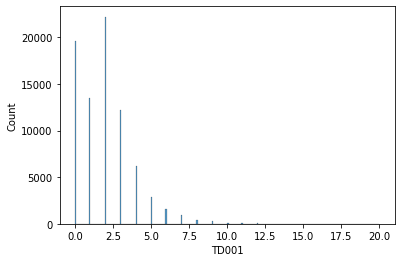

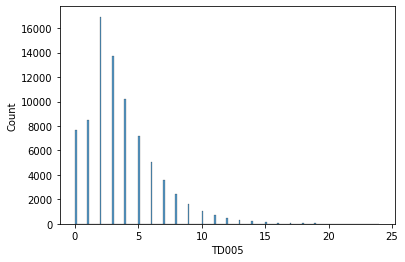

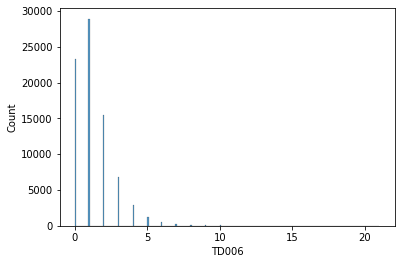

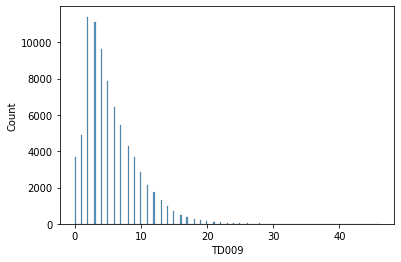

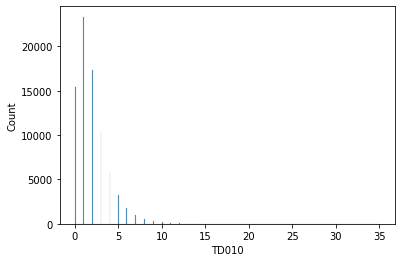

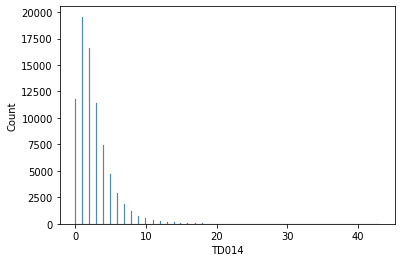

In [8]:
for i in features:
    plt.figure(i)
    sns.histplot(df[i])  # This is seaborn 

### Type 2: Showing the Distribution of Y by Another Variable X
#### (2.1) Box Plot I

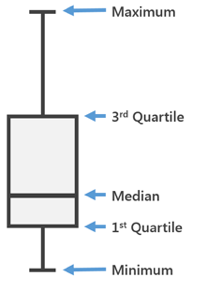

A box plot displays the five-number summary of a set of data: the minimum, first quartile (Q1, 25%), median (Q2, 50%), third quartile (Q3, 75%), and maximum. The box covers the data from the first quartile to the third quartile.

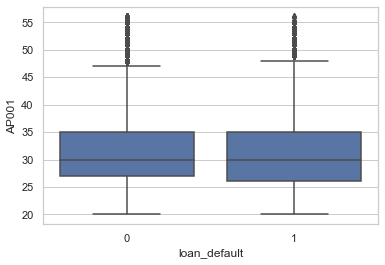

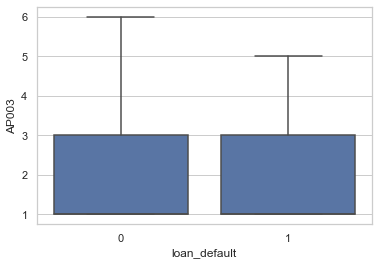

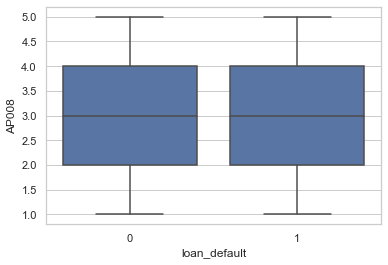

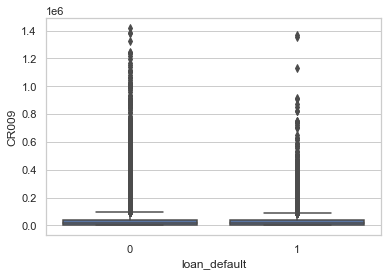

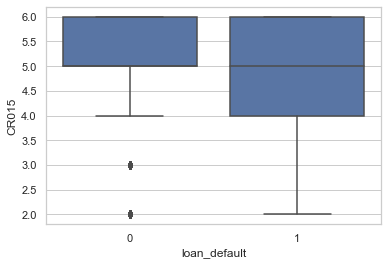

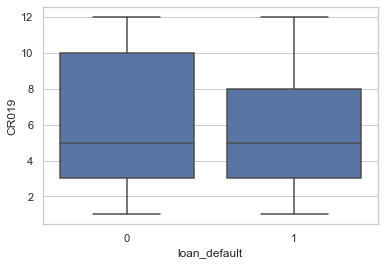

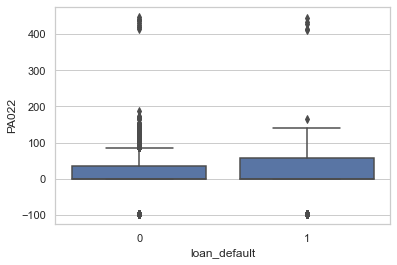

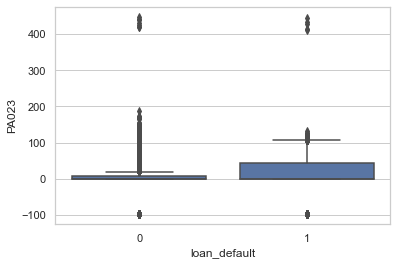

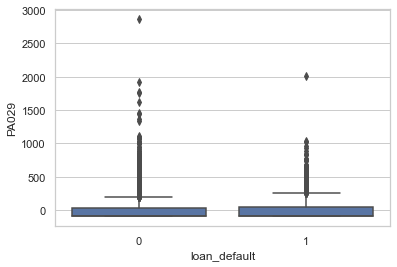

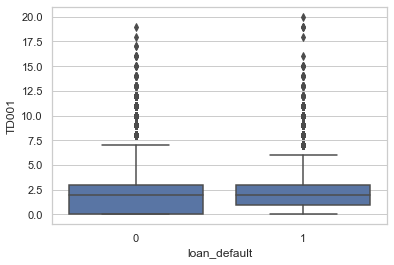

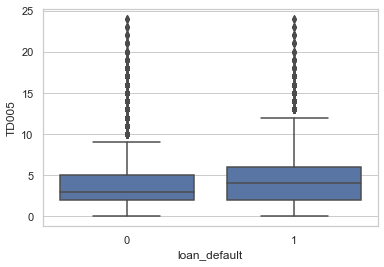

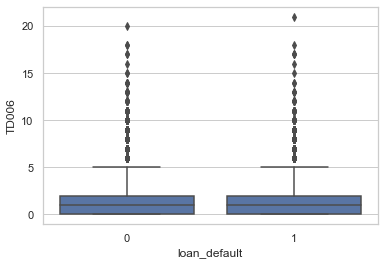

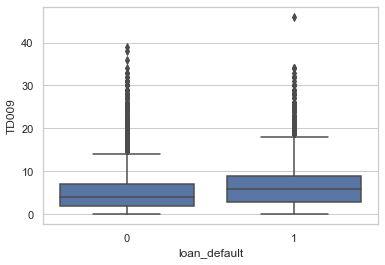

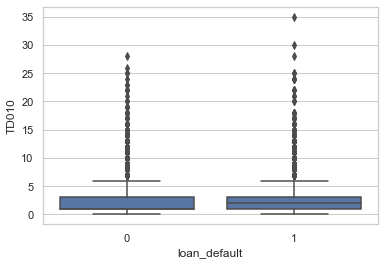

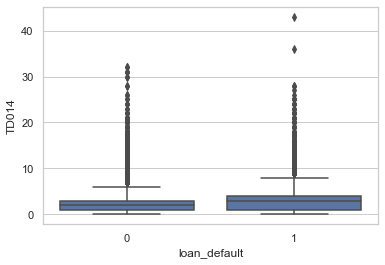

In [9]:
sns.set(style="whitegrid")
for i in features[1:]:
    plt.figure(i)
    sns.boxplot(x="loan_default", y=i, color="b",  data=df)

It is interesting to observe that AP001, CR009, PA022, PA023, PA029, TD001, TD005, TD006, TD009, TD010, TD014 attributes have large number of outliers. To further show enough differentiation for the outliers we will resort to Box Plot Type II.

#### (2.2) Box Plot II
The Box Plot II, or the “letter-value-plot” is a better representation of the distribution of the data as there are many outliers.

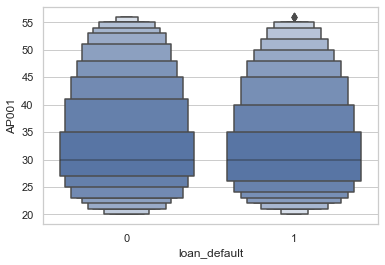

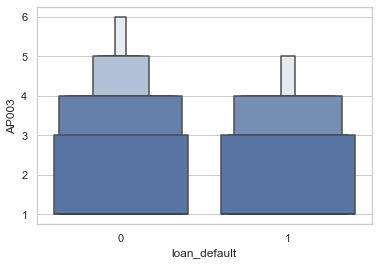

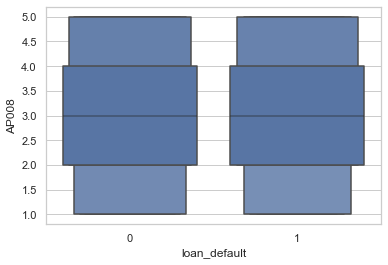

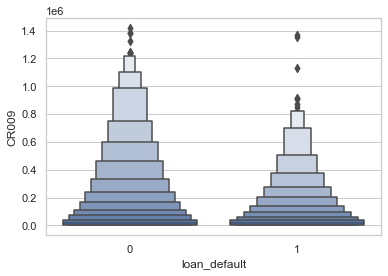

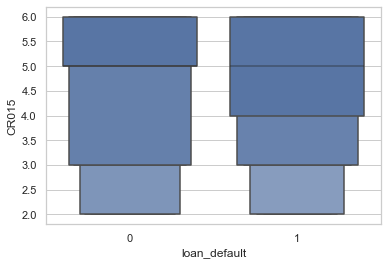

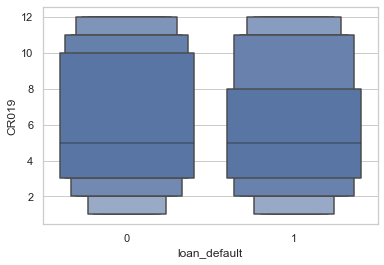

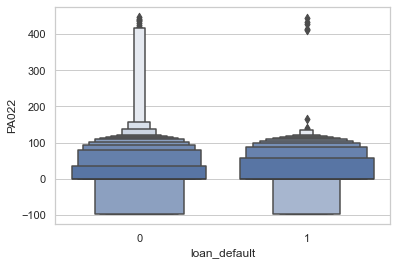

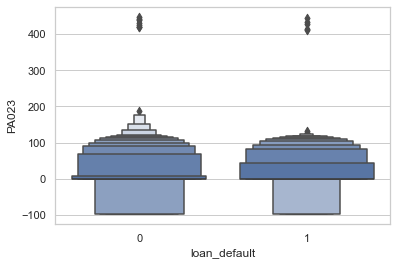

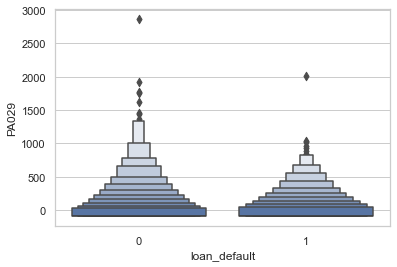

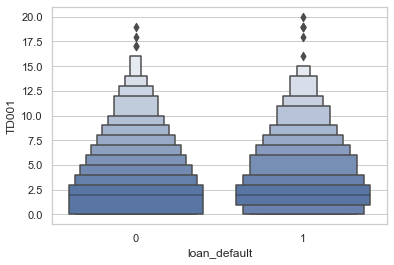

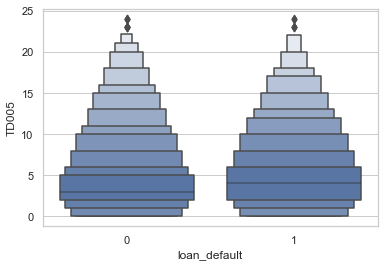

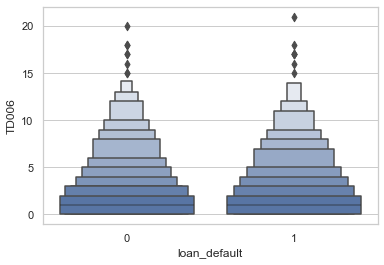

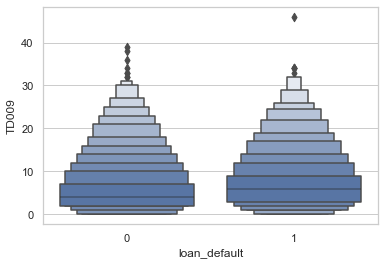

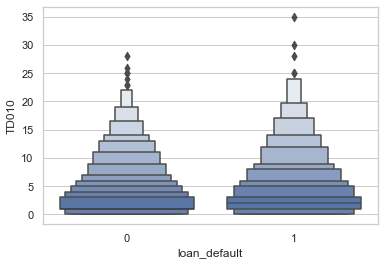

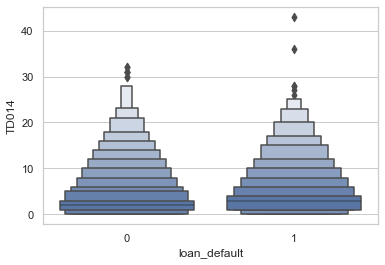

In [10]:
sns.set(style="whitegrid")
for i in features[1:]:
    plt.figure(i)
    sns.boxenplot(x="loan_default", y=i , color="b", scale="linear", data=df)

### Type 3: Showing the Interactions between Variables
#### Correlation Matrix

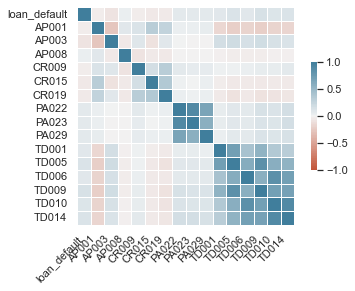

In [11]:
corr = df.corr()


# Set up the matplotlib figure
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 230, n=150),
    square=True, linewidths=.5, cbar_kws={"shrink": .5}
)

sns.set(rc={'figure.figsize':(10,10)})
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#### Pairplot
A pair plot lets us show two important statistics: (a) the distribution of each single variable, and (b) the relationships between two variables.

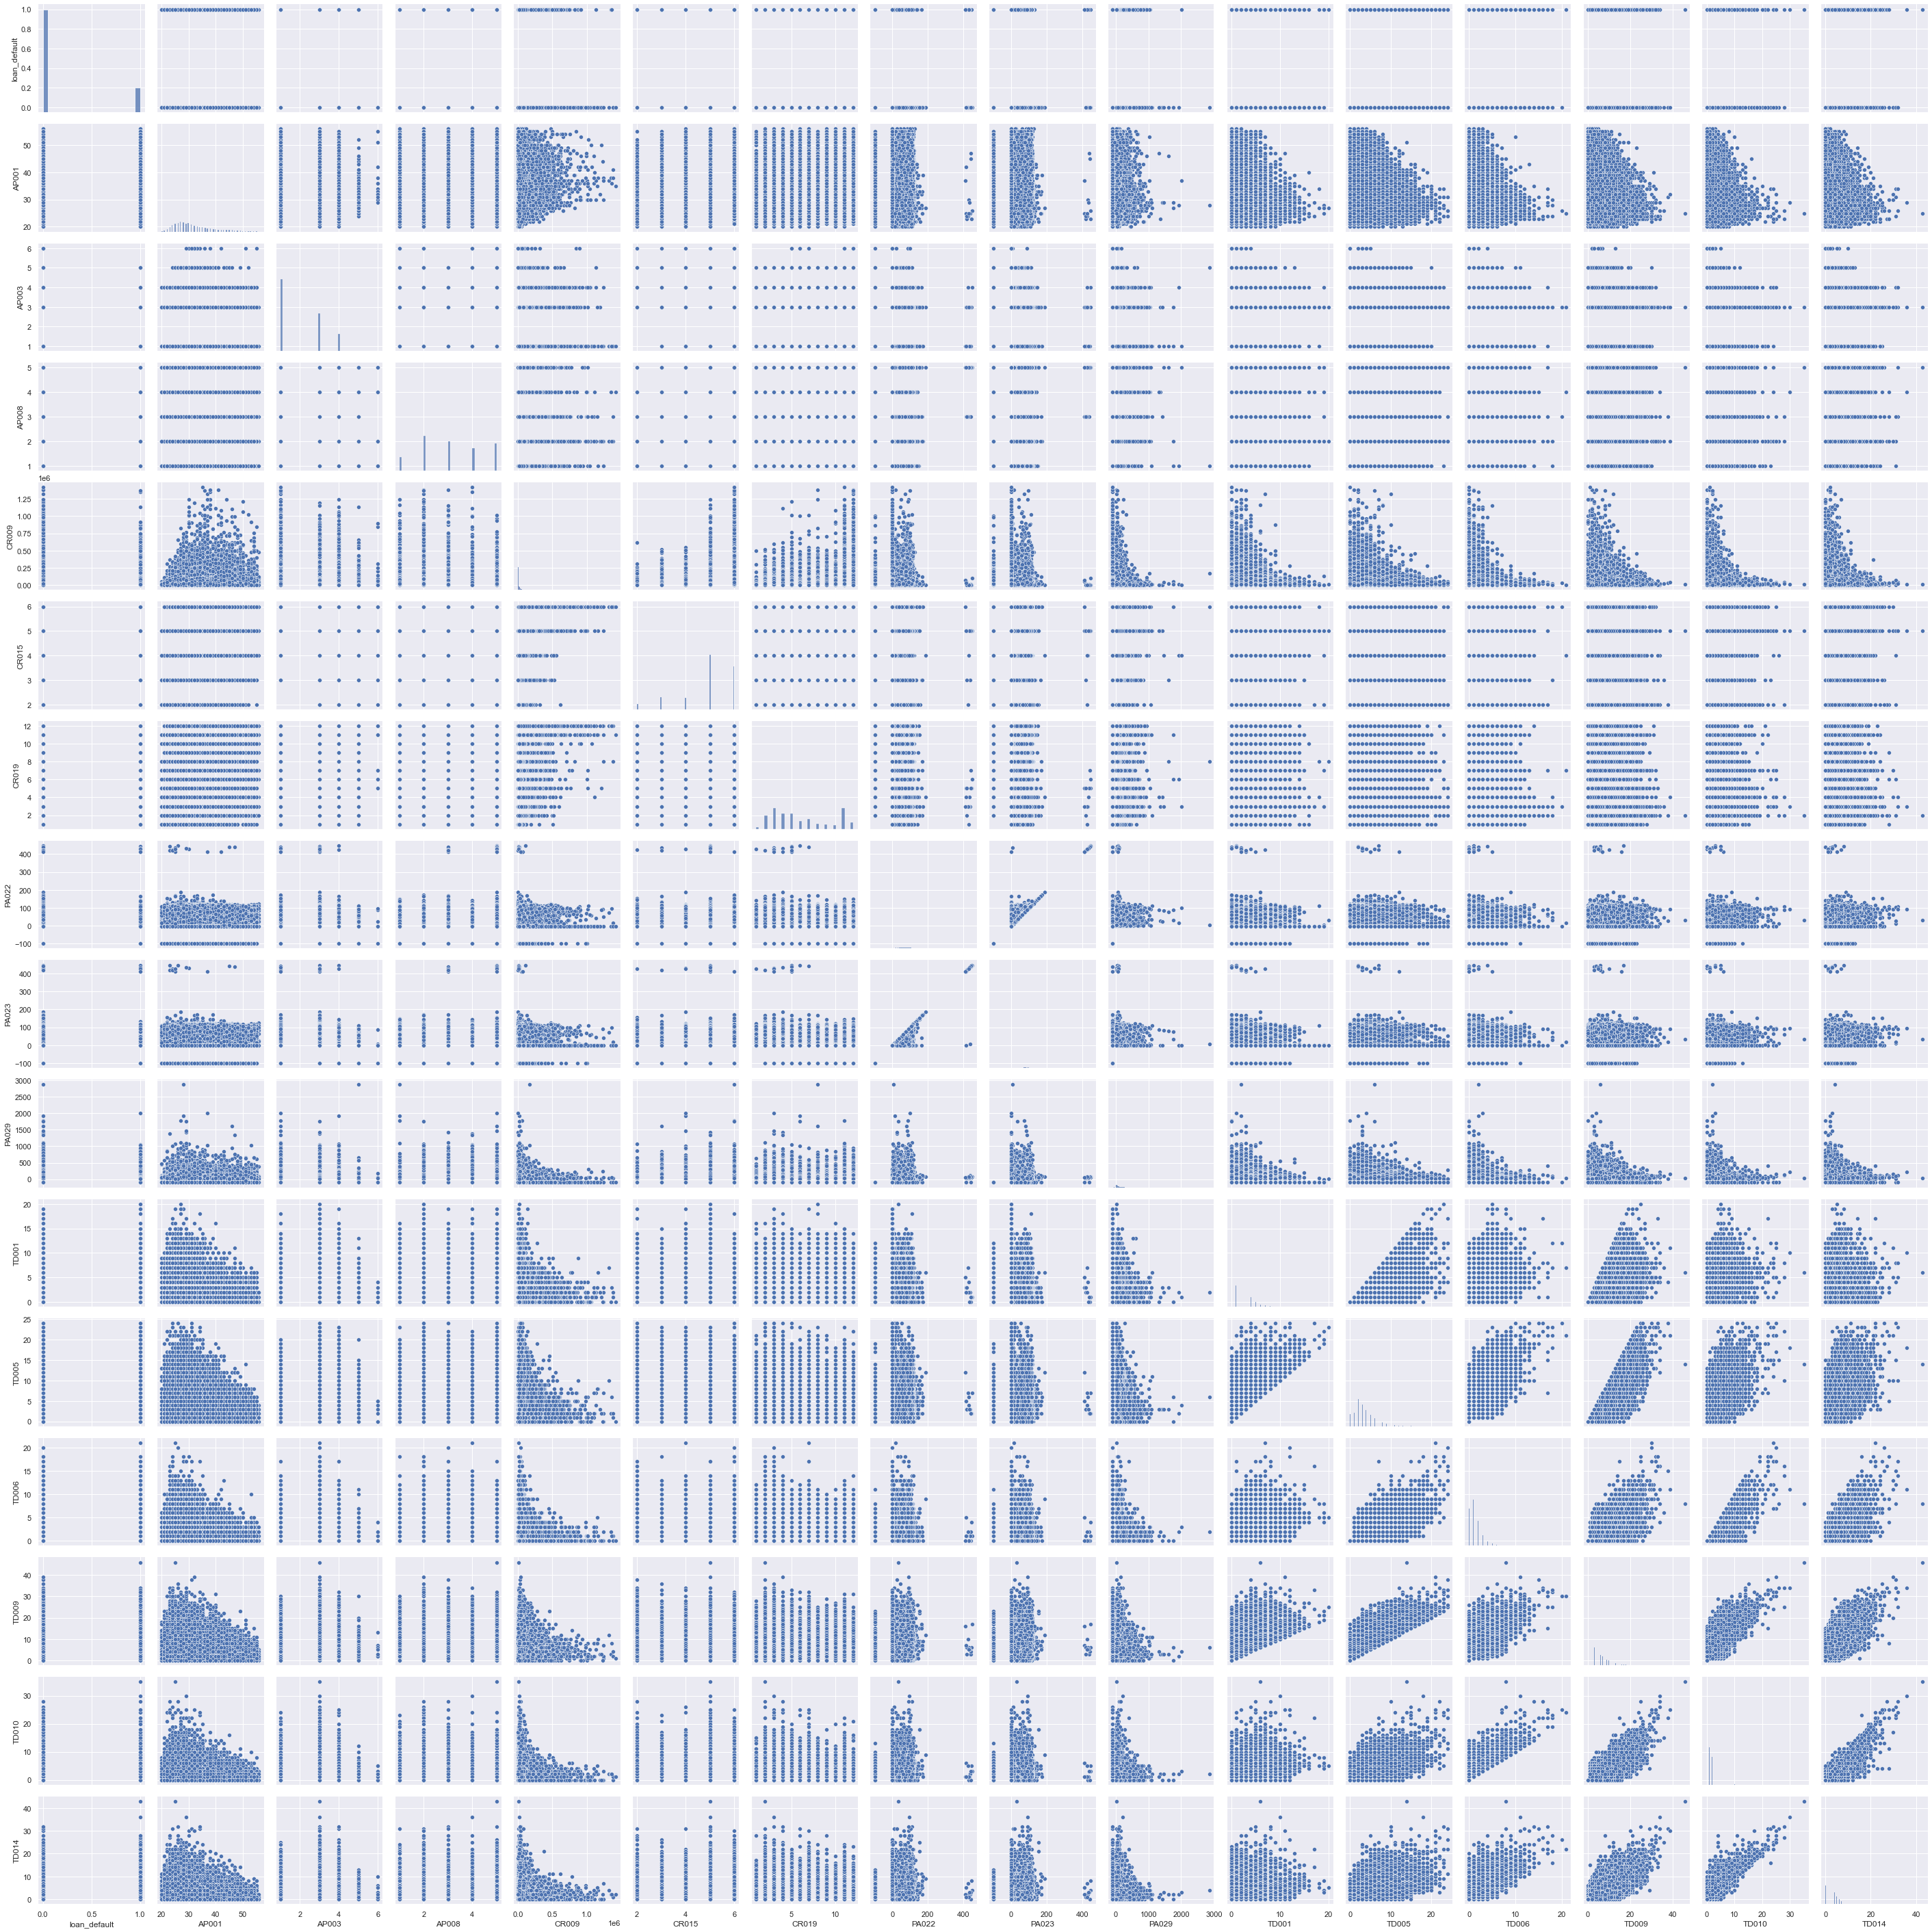

In [12]:
var_list = df.columns
sns.pairplot(df[var_list])

* When AP001 is high, loan_default is low
* When AP003 is high, loan_default is low
* When AP008 is high, loan_default is high
* When CR009 is high, loan_default is low
* When CR015 is high, loan_default is low
* When CR019 is high, loan_default is low
* When PA022 is high, loan_default is high
* When PA023 is high, loan_default is high
* When PA029 is high, loan_default is high
* When TD001 is high, loan_default is high
* When TD005 is high, loan_default is high
* When TD006 is high, loan_default is high
* When TD009 is high, loan_default is high
* When TD010 is high, loan_default is high
* When TD014 is high, loan_default is high

## Section 2: Weight of Evidence (WOE) ENCODING
##### Weight of evidence (WOE) is a widely used technique in credit risk modeling or called the probability of default modeling (such models predict how capable an applicant is able to repay the loan).

The goal of such transformation is to get the maximum difference among the binned categories relating to the target variable. It counts the number of responders and non-responders in each binned categories, then assigns a numeric value to each of the binned categories. 

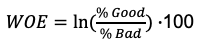

In [13]:
def WOE(var):
    try:
        df[var] = df[var].fillna('NoData')
    except:
        pass
    k = df[[var,'loan_default']].groupby(var)['loan_default'].agg(['count','sum']).reset_index()
    k.columns = [var,'Count','Bad']
    k['Good'] = k['Count'] - k['Bad']
    k['Good %'] = (k['Good'] / k['Good'].sum()*100).round(2)
    k['Bad %'] = (k['Bad'] / k['Bad'].sum()*100).round(2)
    ratio = k['Good %'] / k['Bad %']
    k[var+'_WOE'] = np.log(ratio).round(2)
    k = k.sort_values(by=var+'_WOE')
    return(k)

##### Creating Bins for each variable 

In [14]:
for i in features[1:]:
    var = i
    binned_var = var + '_D'
    percentile = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]
    df[binned_var] = pd.qcut( df[var],percentile,duplicates='drop')

#### Selecting the the bin attributes for respective variables

In [15]:
features1 = ['AP001_D', 'AP003_D', 'AP008_D', 'CR009_D', 'CR015_D','CR019_D', 'PA022_D', 'PA023_D', 'PA029_D', 'TD001_D', 'TD005_D','TD006_D', 'TD009_D', 'TD010_D', 'TD014_D']

#### Plotting the distribution across each bins

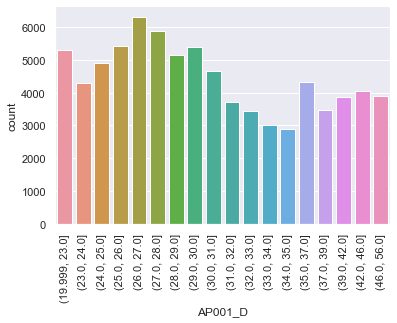

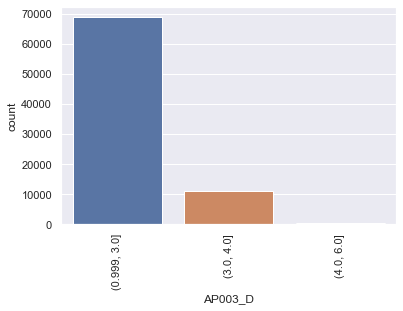

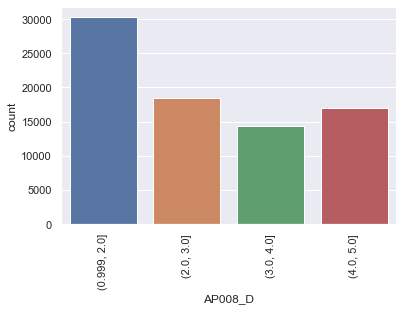

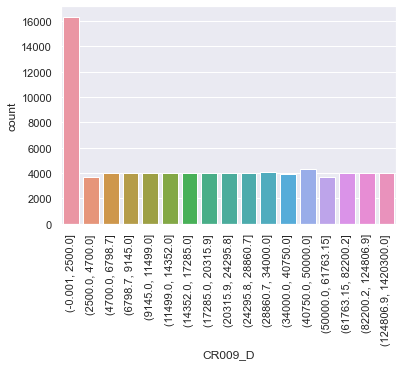

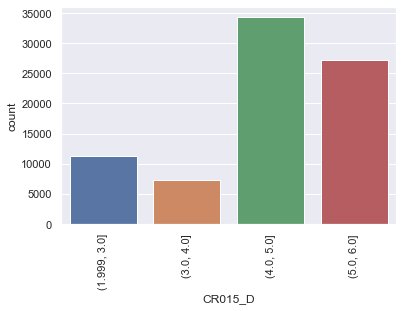

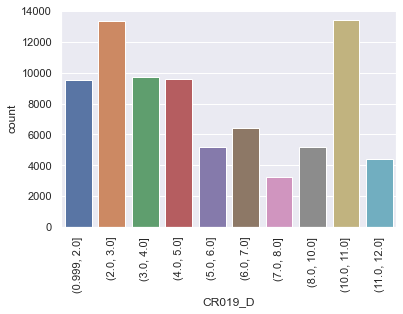

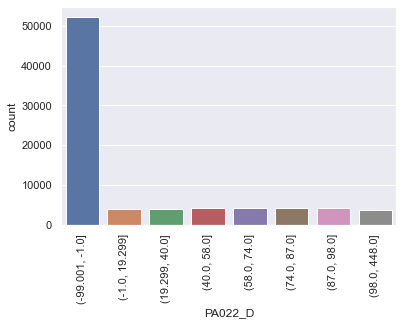

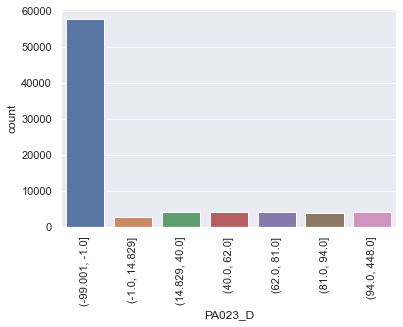

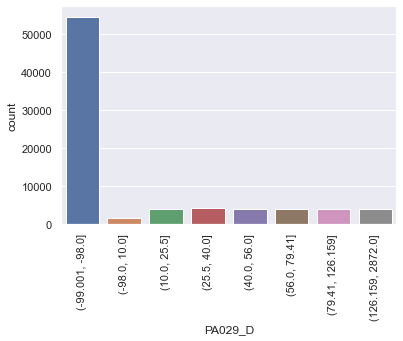

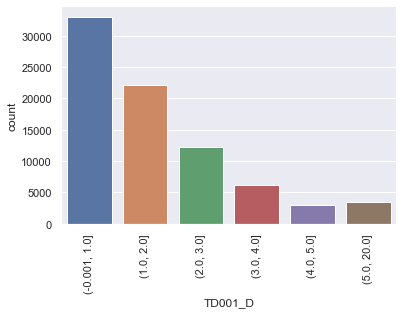

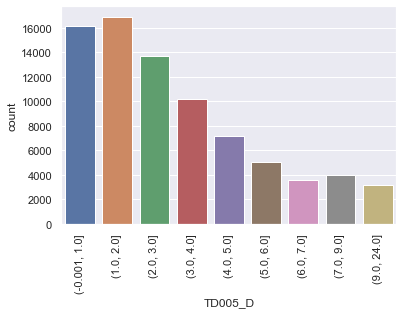

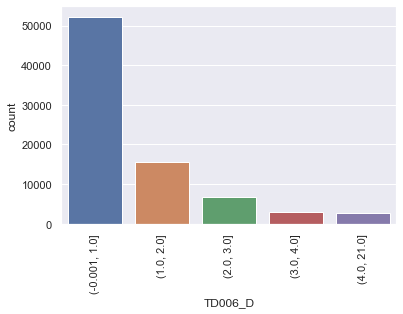

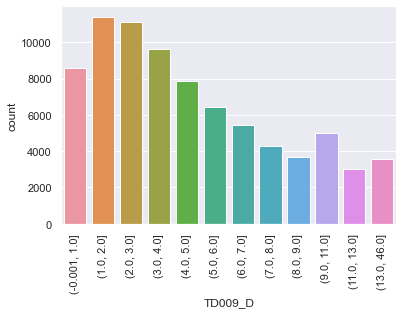

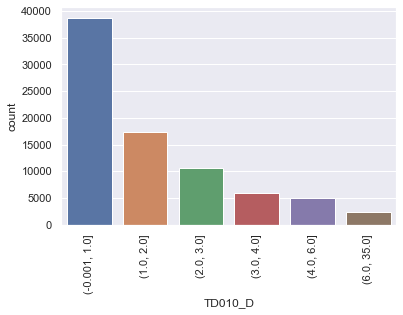

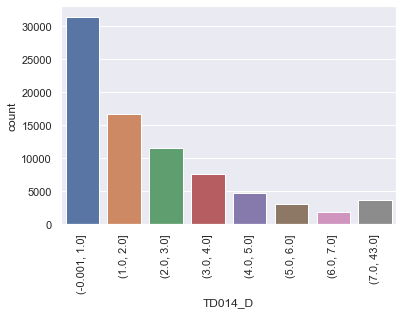

In [16]:
for i in features1:
    plt.figure(figsize=(6,4))
    g = sns.countplot(x=i, data=df)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)

#### Passing the Bins attributes to WOE function to create respective weights

In [17]:
for f in features1:
    try:
        k = WOE(f)
        df = pd.merge(df,k[[f,f+'_WOE']], left_on=f, right_on=f,how='left')
    except:
        pass

#### verifying for missing values

In [18]:
missing_values = df.isnull().sum()
missing_values_per = (df.isnull().sum() / df.isnull().count())
pd.concat([missing_values, missing_values_per],axis=1, keys = ['Count_of_Missing','Percentage'])

,Count_of_Missing,Percentage
loan_default,0,0.0
AP001,0,0.0
AP003,0,0.0
AP008,0,0.0
CR009,0,0.0
CR015,0,0.0
CR019,0,0.0
PA022,0,0.0
PA023,0,0.0
PA029,0,0.0


#### selecting features and creating the sub-set dataframe

In [19]:
feature2 = ['loan_default','AP001_D_WOE', 'AP003_D_WOE', 'AP008_D_WOE', 'CR009_D_WOE', 'CR015_D_WOE','CR019_D_WOE', 'PA022_D_WOE', 'PA023_D_WOE', 'PA029_D_WOE','TD001_D_WOE', 'TD005_D_WOE', 'TD006_D_WOE', 'TD009_D_WOE','TD010_D_WOE', 'TD014_D_WOE']
df2 = df[feature2]

## Section 3: 
### Section 3.1: Building a decision tree

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # for classification
from sklearn.tree import DecisionTreeRegressor # for regression

In [21]:
# Creating trainina and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(df2[feature2[1:]], df2['loan_default'], random_state=0)
# First, specify the model. 
dtree = DecisionTreeClassifier(min_samples_leaf = 5, max_depth = 6)
# Then, train the model.
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5)

#### Show the Importance of the "key questions" with the "variable importance"

In [22]:
importances = pd.DataFrame({'feature': X_train.columns, 'importance': np.round(dtree.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
12,TD009_D_WOE,0.467
1,AP003_D_WOE,0.143
4,CR015_D_WOE,0.107
7,PA023_D_WOE,0.052
8,PA029_D_WOE,0.050
10,TD005_D_WOE,0.039
2,AP008_D_WOE,0.029
6,PA022_D_WOE,0.027
14,TD014_D_WOE,0.027
0,AP001_D_WOE,0.024


##### Using pandas to plot a bar chart.

<AxesSubplot:xlabel='feature'>

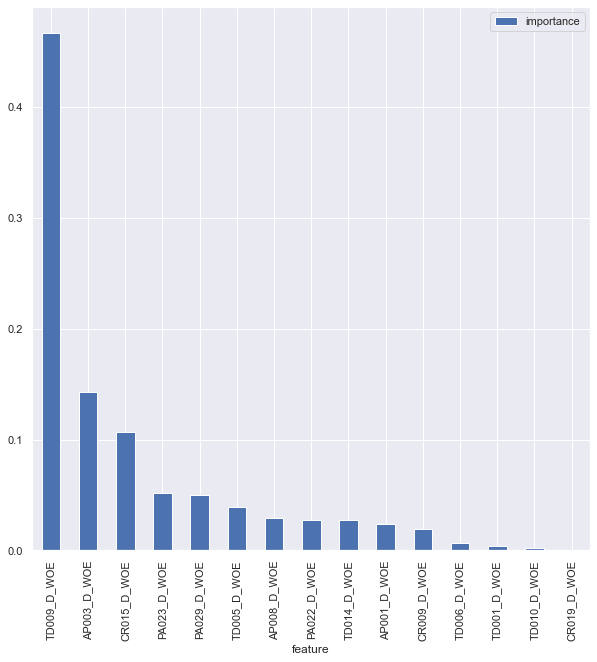

In [23]:
importances.plot.bar(x='feature')

#### Predict new observations
##### predict(): the cutpoint of predict() is 0.5. It's the only sensible threshold from a mathematical viewpoint.

In [24]:
predictions = dtree.predict(X_test[0:10])
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

##### predict_proba(): (p0,p1)

In [25]:
dtree.predict_proba(X_test[0:10])

array([[0.81872852, 0.18127148],
       [0.76081757, 0.23918243],
       [0.81424114, 0.18575886],
       [0.82952468, 0.17047532],
       [0.76081757, 0.23918243],
       [0.92136395, 0.07863605],
       [0.87991718, 0.12008282],
       [0.64653641, 0.35346359],
       [0.92136395, 0.07863605],
       [0.79187817, 0.20812183]])

In [26]:
y_pred = dtree.predict_proba(X_test[0:10])[:,1]
y_pred

array([0.18127148, 0.23918243, 0.18575886, 0.17047532, 0.23918243,
       0.07863605, 0.12008282, 0.35346359, 0.07863605, 0.20812183])

### 3.2 Evaluation a classification decision tree model
### 3.2.1 Confusion Matrix

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix

In [28]:
predictions = dtree.predict(X_test[feature2[1:]])
print(accuracy_score(Y_test,predictions))

0.81115


In [29]:
np.count_nonzero(Y_test == 1)

3775

In [30]:
confusion_matrix(Y_test,predictions)

array([[16219,     6],
       [ 3771,     4]], dtype=int64)

In [31]:
cm = pd.DataFrame(confusion_matrix(Y_test,predictions))
cm.rename(columns={0:'Predicted Low', 1:'Predicted High'},
         index = {0:'Actual Low',1:'Actual High'},inplace=True)
cm

,Predicted Low,Predicted High
Actual Low,16219,6
Actual High,3771,4


### 3.2.2 ROC
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds.

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score

In [33]:
y_pred = dtree.predict_proba(X_test[feature2[1:]])[:,1]
roc_auc_value = roc_auc_score(Y_test,y_pred)
roc_auc_value

0.6303078031408486

AUC represents the probability that a random positive example is positioned to the right of a random negative example. AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0. Our Model gets 63.48% right predictions.

In [34]:
fpr, tpr, _ = roc_curve(Y_test, y_pred)
[fpr,tpr]

[array([0.00000000e+00, 3.69799692e-04, 6.77966102e-04, 4.80739599e-03,
        9.18335901e-03, 9.24499230e-03, 9.49152542e-03, 1.94761171e-02,
        3.44530046e-02, 3.68567026e-02, 3.71032357e-02, 4.40677966e-02,
        4.57935285e-02, 6.86594761e-02, 7.08782743e-02, 9.75654854e-02,
        1.08536210e-01, 1.16733436e-01, 1.18274268e-01, 1.37195686e-01,
        1.39044684e-01, 1.41571649e-01, 1.49830508e-01, 1.56178737e-01,
        1.75038521e-01, 1.92912173e-01, 2.08998459e-01, 2.22927581e-01,
        2.93929122e-01, 3.09152542e-01, 3.23636364e-01, 3.26964561e-01,
        3.37010786e-01, 3.37750385e-01, 3.37996918e-01, 3.40092450e-01,
        4.94052388e-01, 4.96825886e-01, 5.19013867e-01, 5.42434515e-01,
        5.44468413e-01, 5.51124807e-01, 5.57842835e-01, 5.94946071e-01,
        5.98212635e-01, 5.98890601e-01, 6.00554700e-01, 6.18120185e-01,
        6.18736518e-01, 7.52419106e-01, 7.55192604e-01, 7.63204931e-01,
        7.77134052e-01, 8.55285054e-01, 8.62557781e-01, 8.753158

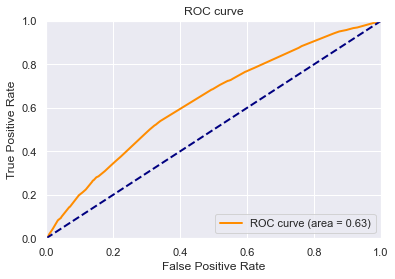

In [35]:
import matplotlib.pyplot as plt
lw=2
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' %roc_auc_value)
plt.plot([0,1],[0,1], color='navy',lw=lw,linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

### 3.2.3 Gains Table

<AxesSubplot:xlabel='decile'>

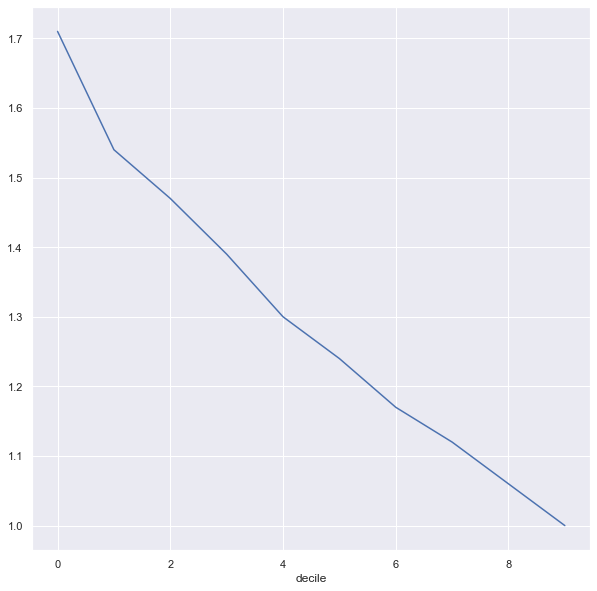

In [36]:
def gains_table(Y_test,y_pred):
    df_prep = pd.DataFrame(columns = ['actual','pred'])
    df_prep['actual'] = Y_test
    df_prep['pred'] =y_pred
    df_prep = df_prep.sort_values(by='pred',ascending=False)
    df_prep['row_id'] = range(0,0+len(df_prep))
    df_prep.head()

    df_prep['decile'] = (df_prep['row_id'] / (len(df_prep)/10)).astype(int)
    df_prep.loc[df_prep['decile'] == 10] =9
    df_prep['decile'].value_counts()

    # Create gains table
    gains = df_prep.groupby('decile')['actual'].agg(['count','sum'])
    gains.columns = ['count','actual']
    gains

    gains['non_actual'] = gains['count'] - gains['actual']
    gains['cum_count'] = gains['count'].cumsum()
    gains['cum_actual'] = gains['actual'].cumsum()
    gains['cum_non_actual'] = gains['non_actual'].cumsum()
    gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
    gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
    gains['if_random'] = np.max(gains['cum_actual']) /10
    gains['if_random'] = gains['if_random'].cumsum()
    gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
    gains['K_S'] = np.abs( gains['percent_cum_actual'] - gains['percent_cum_non_actual']  ) * 100 
    gains['gain'] = (gains['cum_actual'] / gains['cum_count']*100).round(2)
    return(gains)
    
gains = gains_table(Y_test,y_pred)
gains
gains['lift'].plot.line()

### 3.2.4 Cumulative Lift

<AxesSubplot:xlabel='decile'>

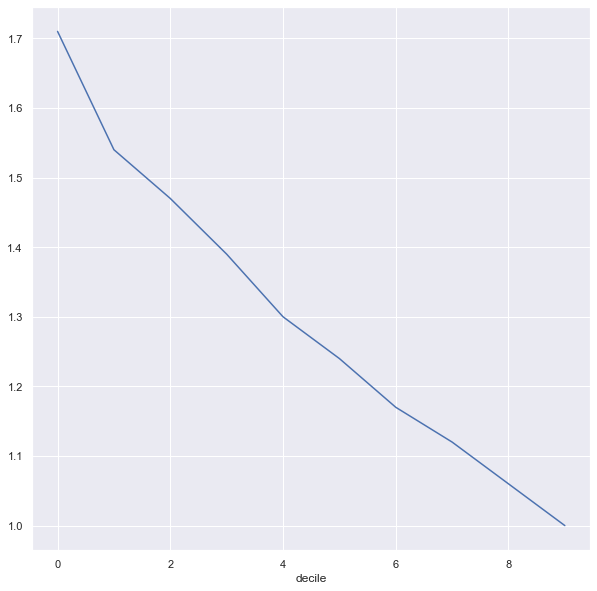

In [37]:
gains['lift'].plot.line()

<AxesSubplot:ylabel='actual'>

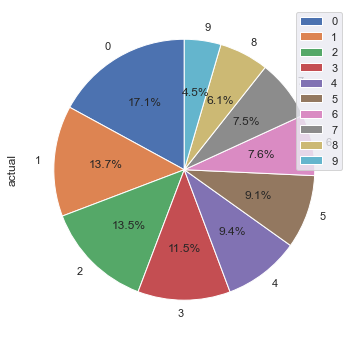

In [38]:
gains.plot.pie(y='actual',figsize=(6,6),autopct = '%1.1f%%', startangle=90)

### 3.2.5 Komogorov-Smirnov (K-S)

<AxesSubplot:xlabel='decile'>

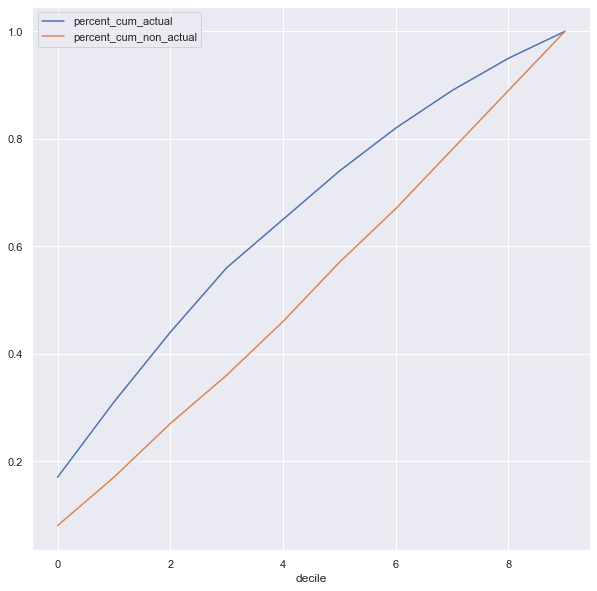

In [39]:
gains[['percent_cum_actual','percent_cum_non_actual']].plot.line()

In [40]:
gains['K_S'].max()

20.000000000000007

## Section 4: Regression Tree with scikit-learn

In [41]:
Xr_train, Xr_test, Yr_train, Yr_test = train_test_split(df2[feature2[1:]], df2['loan_default'], random_state=0)

In [42]:
# First, specify the model. 
rtree = DecisionTreeRegressor()
# Then, train the model.
rtree.fit(Xr_train,Yr_train)

DecisionTreeRegressor()

In [43]:
yr_pred = rtree.predict(Xr_test)
yr_pred

array([0., 1., 0., ..., 0., 0., 0.])

In [44]:
pd.crosstab(Yr_test,yr_pred)

col_0,0.000000,0.100000,0.125000,0.142857,0.153846,0.166667,0.200000,0.222222,0.250000,0.285714,0.300000,0.333333,0.400000,0.500000,0.666667,1.000000
loan_default,,,,,,,,,,,,,,,,
0,12710,1,4,5,2,12,24,1,19,9,2,41,2,76,5,3312
1,2760,0,0,1,0,1,6,0,3,4,0,4,0,10,0,986


### Evaluate a Regression Tree Model

In [45]:
# MEan Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Yr_test,yr_pred)

0.3081814957264957

In [46]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(Yr_test,yr_pred))
rmse

0.5529484514050766

## Build a logistic regression with scikit-learn

In [47]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=1000) 
logistic_model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

### predict with a logistic regression

In [48]:
logistic_model.predict(X_test[0:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [49]:
logistic_model.predict_proba(X_test[0:10])

array([[0.79623061, 0.20376939],
       [0.76443144, 0.23556856],
       [0.83926991, 0.16073009],
       [0.78139071, 0.21860929],
       [0.78204495, 0.21795505],
       [0.88640812, 0.11359188],
       [0.89091539, 0.10908461],
       [0.64144239, 0.35855761],
       [0.86772848, 0.13227152],
       [0.79834716, 0.20165284]])

In [50]:
#accuracy
logistic_model.score(X_test, Y_test)

0.81145

## Conclusion
* Accuracy of Decision Classifier Tree: 81.15%
* RMSE of Decision Regression Tree: 0.55
* Accuracy of Logistic Regression Model: 81.145%

I have created 3 models
* Model 1: using engineered features
* Model 2: using raw features
* Model 3: using combination of both

#### Model Accuray Comparison

* Model 1: 0.81115
* Model 2: 0.81075
* Model 3: 0.81075

We find that the engineered features increase the accuracy of the model when compared to using the existing features directly.
Moreover, we observe that the importance of features in each model also supports that engineered feature increase the accuracy of the model.

#### AUC Comparison:

* Model 1: 0.6303
* Model 2: 0.6349
* Model 3: 0.6348

We find that the models with raw features has the highest AUC value.

# Appendix
### Trying a combination of features to study and demonstrate the effect of creating WOE feature and their effect on modeling, prediction and accuracy.
#### Constructing the decision tree classifier using the given features without transformation

In [63]:
feature3 = ['loan_default', 'AP001', 'AP003', 'AP008', 'CR009', 'CR015', 'CR019','PA022', 'PA023', 'PA029', 'TD001', 'TD005', 'TD006', 'TD009', 'TD010','TD014']
df2 = df[feature3]

In [64]:
# Creating trainina and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(df2[feature3[1:]], df2['loan_default'], random_state=0)
# First, specify the model. 
dtree = DecisionTreeClassifier(min_samples_leaf = 5, max_depth = 6)
# Then, train the model.
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5)

In [65]:
importances = pd.DataFrame({'feature': X_train.columns, 'importance': np.round(dtree.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
12,TD009,0.384
1,AP003,0.220
4,CR015,0.098
10,TD005,0.057
8,PA029,0.055
6,PA022,0.046
14,TD014,0.028
7,PA023,0.026
9,TD001,0.025
13,TD010,0.016


<AxesSubplot:xlabel='feature'>

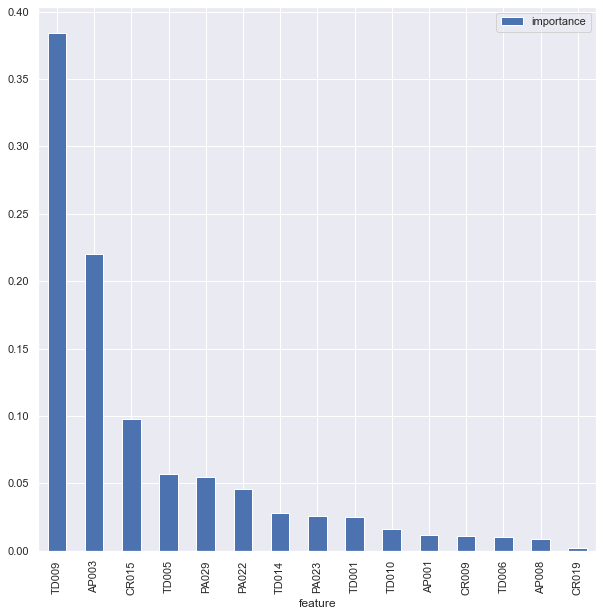

In [66]:
importances.plot.bar(x='feature')

In [67]:
predictions = dtree.predict(X_test[feature3[1:]])
print(accuracy_score(Y_test,predictions))

0.81075


In [69]:
y_pred = dtree.predict_proba(X_test[feature3[1:]])[:,1]
roc_auc_value = roc_auc_score(Y_test,y_pred)
roc_auc_value

0.6349713446055572

In [71]:
fpr, tpr, _ = roc_curve(Y_test, y_pred)

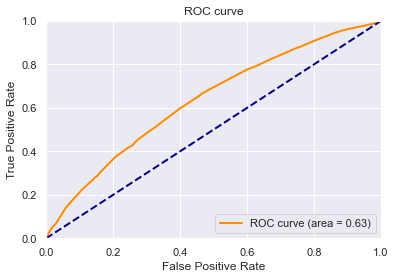

In [72]:
import matplotlib.pyplot as plt
lw=2
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' %roc_auc_value)
plt.plot([0,1],[0,1], color='navy',lw=lw,linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

### Constructing the decision tree classifier using the given features with combination of new engineered features

In [73]:
feature4 = ['loan_default','AP001', 'AP003', 'AP008', 'CR009', 'CR015', 'CR019','PA022', 'PA023', 'PA029', 'TD001', 'TD005', 'TD006', 'TD009', 'TD010','TD014','AP001_D_WOE', 'AP003_D_WOE', 'AP008_D_WOE', 'CR009_D_WOE', 'CR015_D_WOE','CR019_D_WOE', 'PA022_D_WOE', 'PA023_D_WOE', 'PA029_D_WOE','TD001_D_WOE', 'TD005_D_WOE', 'TD006_D_WOE', 'TD009_D_WOE','TD010_D_WOE', 'TD014_D_WOE']
df2 = df[feature4]

In [74]:
# Creating trainina and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(df2[feature4[1:]], df2['loan_default'], random_state=0)
# First, specify the model. 
dtree = DecisionTreeClassifier(min_samples_leaf = 5, max_depth = 6)
# Then, train the model.
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5)

In [75]:
importances = pd.DataFrame({'feature': X_train.columns, 'importance': np.round(dtree.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
12,TD009,0.341
1,AP003,0.216
4,CR015,0.078
8,PA029,0.049
6,PA022,0.046
10,TD005,0.045
27,TD009_D_WOE,0.040
7,PA023,0.026
9,TD001,0.025
29,TD014_D_WOE,0.021


<AxesSubplot:xlabel='feature'>

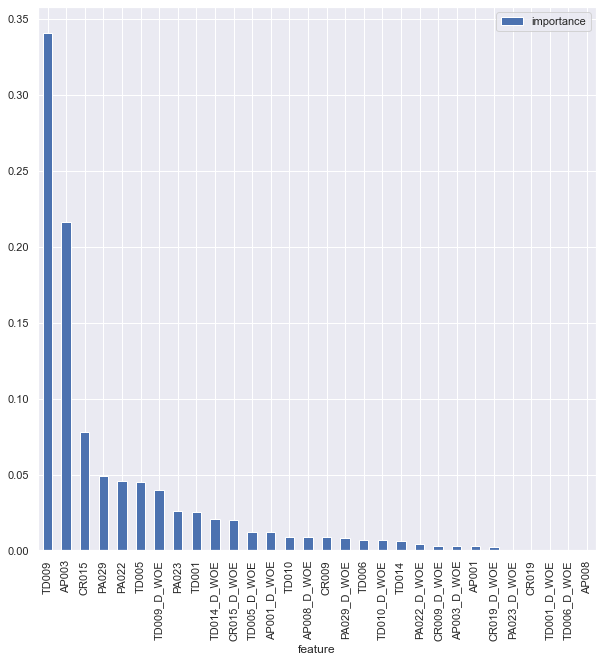

In [76]:
importances.plot.bar(x='feature')

In [77]:
predictions = dtree.predict(X_test[feature4[1:]])
print(accuracy_score(Y_test,predictions))

0.81075


In [78]:
y_pred = dtree.predict_proba(X_test[feature4[1:]])[:,1]
roc_auc_value = roc_auc_score(Y_test,y_pred)
roc_auc_value

0.634816053225033

In [79]:
fpr, tpr, _ = roc_curve(Y_test, y_pred)

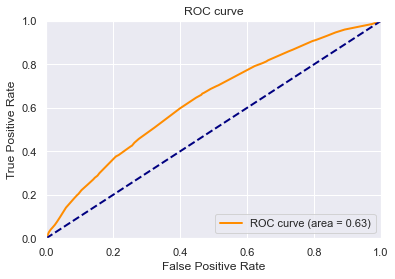

In [80]:
import matplotlib.pyplot as plt
lw=2
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' %roc_auc_value)
plt.plot([0,1],[0,1], color='navy',lw=lw,linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

In [81]:
np.count_nonzero(Y_test == 1)

3775

In [82]:
cm = pd.DataFrame(confusion_matrix(Y_test,predictions))
cm.rename(columns={0:'Predicted Low', 1:'Predicted High'},
         index = {0:'Actual Low',1:'Actual High'},inplace=True)
cm

,Predicted Low,Predicted High
Actual Low,16174,51
Actual High,3734,41
